# Movies Data Analysis
 In this project we are going to be analysing data related to movies to answer some questions.
 We will use three data from three sources one is a csv file and the other two are database tables of a database called im.db which we are going to query data from.Although the database contains several tables we are going to focus on the two as we consider them to be the most relevant for what we are trying to achieve.

In [1]:
#First we start by importing all the required libraries
import pandas as pd
import sqlite3

In [2]:
#we then read our data for cleaning
#Lets start by reading in the csv File.
budget=pd.read_csv('bom.movie_gross.csv.gz')

We explore this budget data set to get some data understanding

In [3]:
budget.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
budget.shape
#the dataframe has 3387 rows and 5 columns


(3387, 5)

The columns represent the following variables.

title:is the title or the name of the movie
studio:it is the studio that the movie was filmed by
domestic_gross:This is the gross revenue generated by the movie from domestics sales,
foreign_gross:This is the revenue the movie generated from foreign sales.
year:is the year the movie was produces

From this we can see the dataframe is about the revenues generated by each movie.

In [5]:
#we will use  .describe() to see the distribution of the data
budget.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
#.info() will give us more information about the data.
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above .info() we can see that the columns studio,domestic_gross and foreign_gross have some missing values
Lets go ahead and see if the data frame has some duplicates


In [7]:
#checking for duplicates
budget.duplicated().sum()
#the data has no duplicates

0

In [8]:
#fill all missing values in the domestic_gross column with the mean of the column
budget['domestic_gross'].fillna(budget['domestic_gross'].mean(),inplace=True)


In [9]:
#we can now check the statistics of the column
#MEAN
domestic_mean=budget['domestic_gross'].mean()
print('Domestic Gross Mean:{}'.format(domestic_mean))

Domestic Gross Mean:28745845.066984236


In [10]:
#MEDIAN
domestic_median=budget['domestic_gross'].median()
print('Domestic Gross Median:{}'.format(domestic_median))

Domestic Gross Median:1400000.0


In [11]:
budget['domestic_gross'].isnull().sum()
#we can see no missing values are left in this column

0

In [12]:
#Checking the data type of the column.
print(budget['foreign_gross'].dtype)

object


In [13]:
#We drop the missing values in the foreign_gross as replacing them might skew the data a lot.
budget['foreign_gross'].dropna(inplace=True)
budget.shape


(3387, 5)

We can now read the tables from the database.

In [14]:
#The first thing is to connect to the database
conn=sqlite3.connect('im.db')

In [15]:
basics=pd.read_sql('''SELECT*FROM movie_basics;''',conn)

In [16]:
#From here we can get some data understanding
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
basics.shape

(146144, 6)

In [18]:
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [19]:
#remove movies with a runtime of more than 240 minutes
long=basics['runtime_minutes']>240

In [20]:
basics['domestic_gross']=budget['domestic_gross']

Below we are going to be putting all our columns into one data set to make it easy to work with.

In [21]:
basics['foreign_gross']=budget['foreign_gross']

In [22]:
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,foreign_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",415000000.0,652000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",334200000.0,691300000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,296000000.0,664300000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",292600000.0,535700000
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",238700000.0,513900000


In [23]:
ratings=pd.read_sql('''SELECT*FROM movie_ratings;''',conn)

In [24]:
ratings.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
basics['ratings']=ratings['averagerating']

In [26]:
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,foreign_gross,ratings
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",415000000.0,652000000,8.3
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",334200000.0,691300000,8.9
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,296000000.0,664300000,6.4
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",292600000.0,535700000,4.2
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",238700000.0,513900000,6.5


In [27]:
basics.describe()

,start_year,runtime_minutes,domestic_gross,ratings
count,146144.000000,114405.000000,3.387000e+03,73856.000000
mean,2014.621798,86.187247,2.874585e+07,6.332729
std,2.733583,166.360590,6.670497e+07,1.474978
min,2010.000000,1.000000,1.000000e+02,1.000000
25%,2012.000000,70.000000,1.225000e+05,5.500000
50%,2015.000000,87.000000,1.400000e+06,6.500000
75%,2017.000000,99.000000,2.874585e+07,7.400000
max,2115.000000,51420.000000,9.367000e+08,10.000000


In [28]:
#only remain with necessary columns.
necessary_columns=['runtime_minutes','genres','domestic_gross','foreign_gross','ratings']

In [29]:
basics=basics[necessary_columns]

In [30]:
basics.head()

,runtime_minutes,genres,domestic_gross,foreign_gross,ratings
0,175.0,"Action,Crime,Drama",415000000.0,652000000,8.3
1,114.0,"Biography,Drama",334200000.0,691300000,8.9
2,122.0,Drama,296000000.0,664300000,6.4
3,NaN,"Comedy,Drama",292600000.0,535700000,4.2
4,80.0,"Comedy,Drama,Fantasy",238700000.0,513900000,6.5


In [31]:
print(basics['foreign_gross'].dtype)

object


In [32]:
basics.shape

(146144, 5)

In [33]:
#drop all the missing values in our data
basics.dropna(inplace=True)

In [34]:
basics.isnull().sum()
#no missing values

runtime_minutes    0
genres             0
domestic_gross     0
foreign_gross      0
ratings            0
dtype: int64

Let us do some visuals

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
basics

,runtime_minutes,genres,domestic_gross,foreign_gross,ratings
0,175.0,"Action,Crime,Drama",415000000.0,652000000,8.3
1,114.0,"Biography,Drama",334200000.0,691300000,8.9
2,122.0,Drama,296000000.0,664300000,6.4
4,80.0,"Comedy,Drama,Fantasy",238700000.0,513900000,6.5
5,75.0,Comedy,300500000.0,398000000,6.2
...,...,...,...,...,...
3263,90.0,Horror,2000000.0,1200000,7.8
3265,88.0,Comedy,1100000.0,2000000,5.3
3268,57.0,Animation,1300.0,2500000,6.7
3271,70.0,"Documentary,History",491000.0,1700000,5.4


In [37]:
#Most produced Genres
list(dict(basics['genres'].value_counts().head(10)).keys())

['Documentary',
 'Drama',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Thriller',
 'Action',
 'Drama,Romance',
 'Comedy,Drama,Romance',
 'Comedy,Romance']

In [40]:
#We add the popularity column into our basics data
basics['popularity']=pop['popularity']

NameError: name 'pop' is not defined

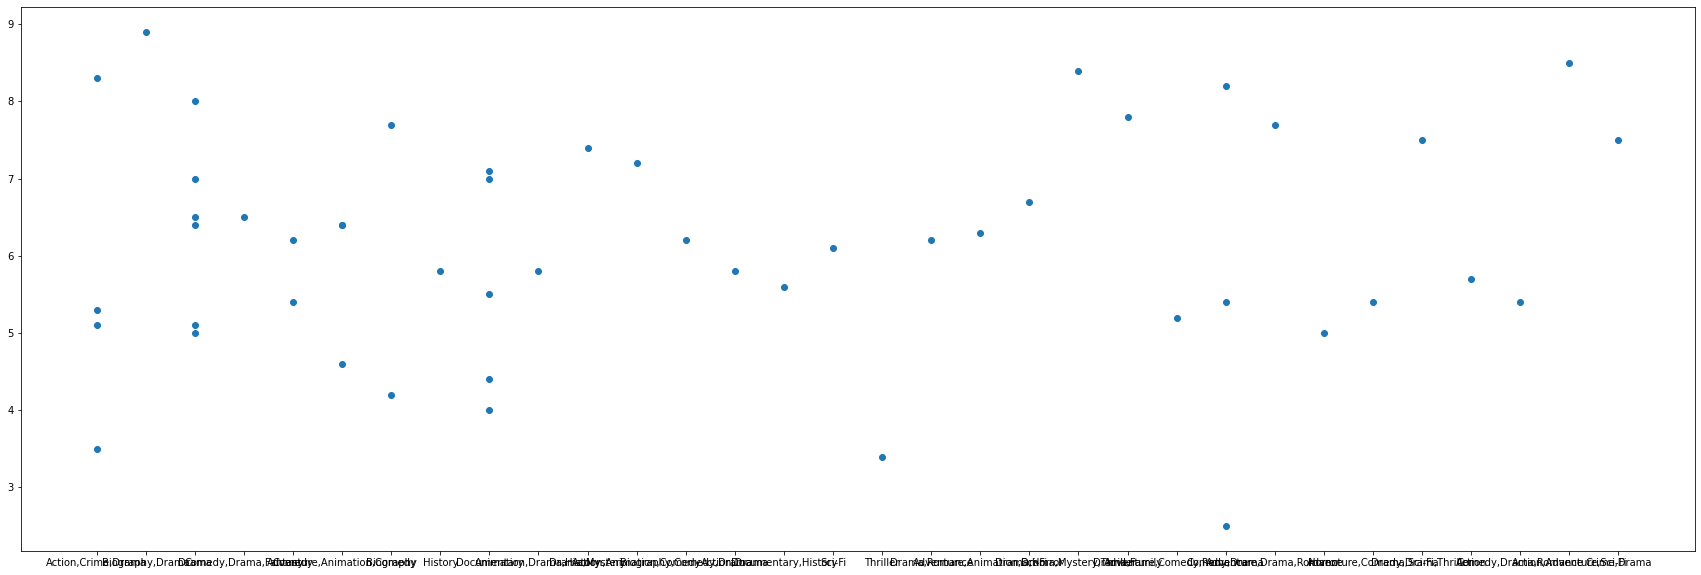

In [41]:
fig,ax=plt.subplots(figsize=(30,10))
ax.scatter(basics['genres'].head(50),basics['ratings'].head(50))

In [42]:
basics.corr()

,runtime_minutes,domestic_gross,ratings
runtime_minutes,1.000000,-0.000056,0.026818
domestic_gross,-0.000056,1.000000,0.004934
ratings,0.026818,0.004934,1.000000


In [43]:
part=basics.head(10)

In [44]:
part

,runtime_minutes,genres,domestic_gross,foreign_gross,ratings
0,175.0,"Action,Crime,Drama",415000000.0,652000000,8.3
1,114.0,"Biography,Drama",334200000.0,691300000,8.9
2,122.0,Drama,296000000.0,664300000,6.4
4,80.0,"Comedy,Drama,Fantasy",238700000.0,513900000,6.5
5,75.0,Comedy,300500000.0,398000000,6.2
7,83.0,"Adventure,Animation,Comedy",200800000.0,391000000,6.4
9,82.0,Biography,217600000.0,277300000,4.2
10,136.0,Drama,163200000.0,330000000,5.1
11,100.0,History,104400000.0,311300000,5.8
12,180.0,Documentary,135500000.0,275400000,7.0


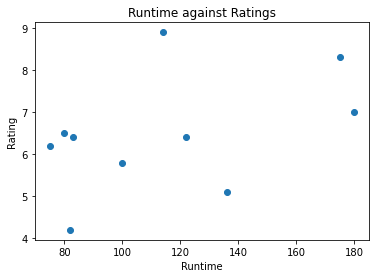

In [45]:
fig,ax=plt.subplots()
ax.scatter(part['runtime_minutes'],part['ratings'])
ax.set_xlabel('Runtime')
ax.set_ylabel('Rating')
ax.set_title('Runtime against Ratings');

From the above visualization we can see that their is no relationship between runtime and the earings

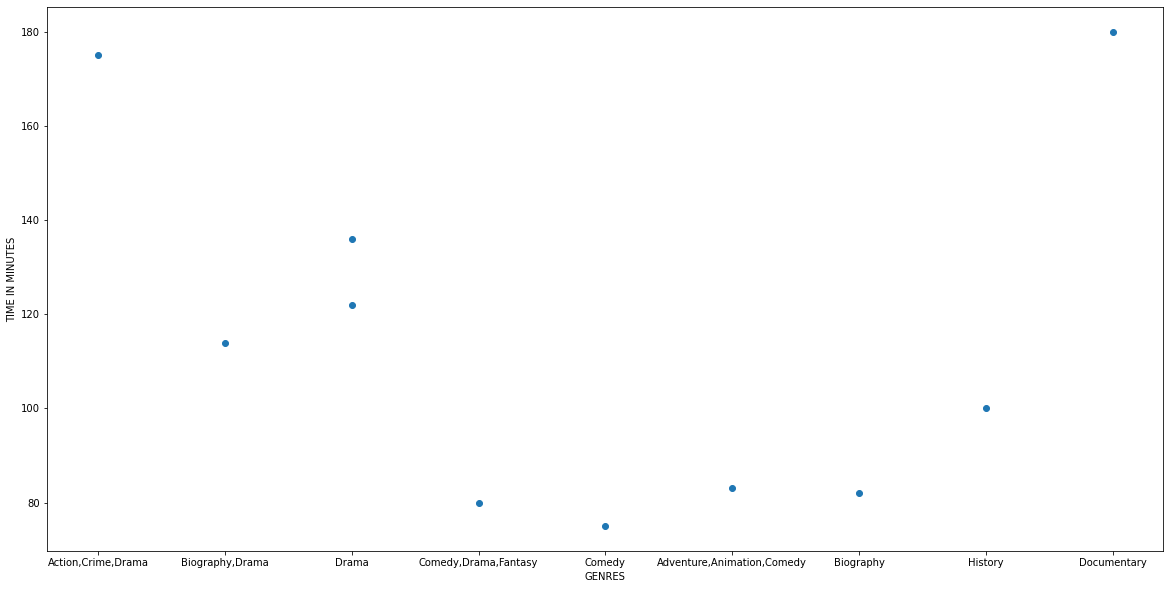

In [46]:
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(part['genres'],part['runtime_minutes'])
ax.set_xlabel('GENRES')
ax.set_ylabel('TIME IN MINUTES');

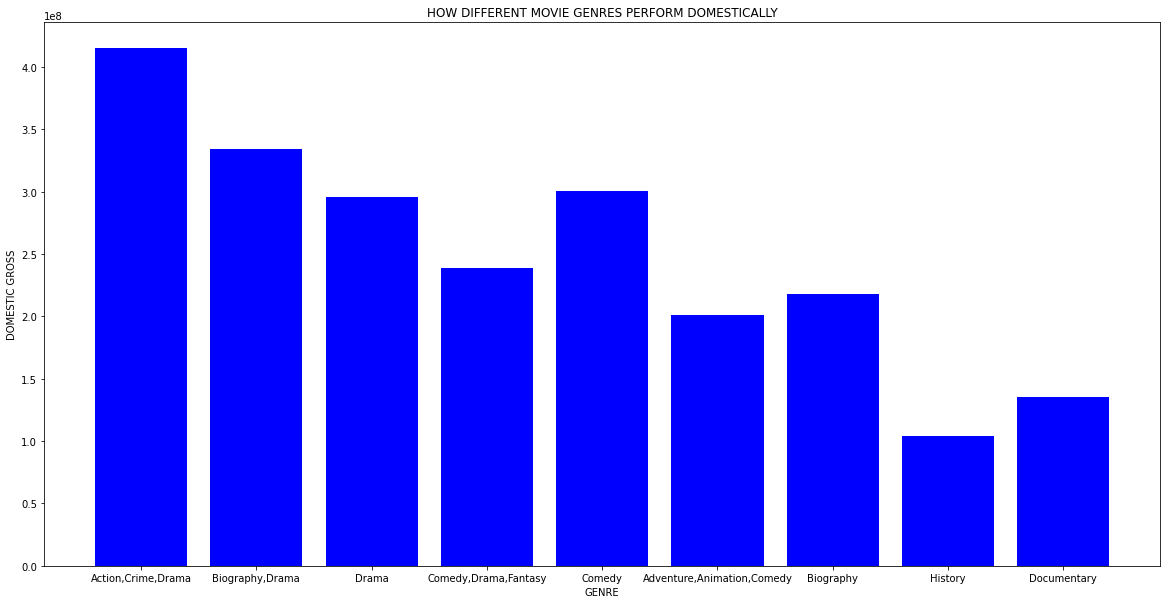

In [47]:
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(part['genres'],part['domestic_gross'],color='blue')
ax.set_xlabel('GENRE')
ax.set_ylabel('DOMESTIC GROSS')
ax.set_title('HOW DIFFERENT MOVIE GENRES PERFORM DOMESTICALLY');

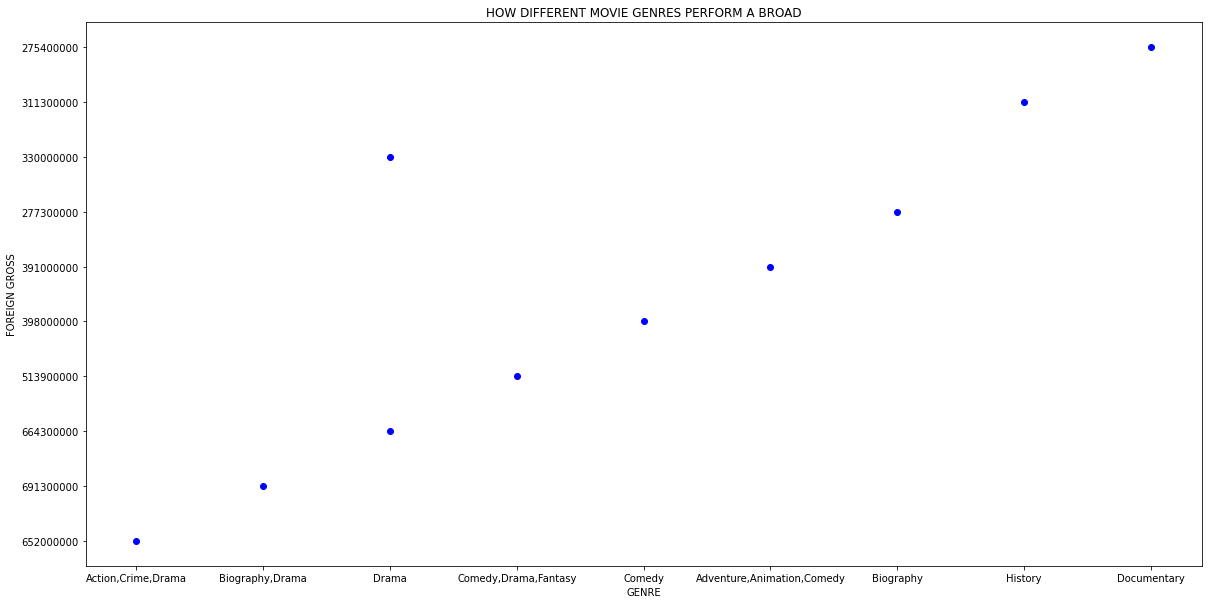

In [48]:
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(part['genres'],part['foreign_gross'],color='blue')
ax.set_xlabel('GENRE')
ax.set_ylabel('FOREIGN GROSS')
ax.set_title('HOW DIFFERENT MOVIE GENRES PERFORM A BROAD');

Text(0.5, 1.0, 'GENRES AGAINST THEIR RATINGS')

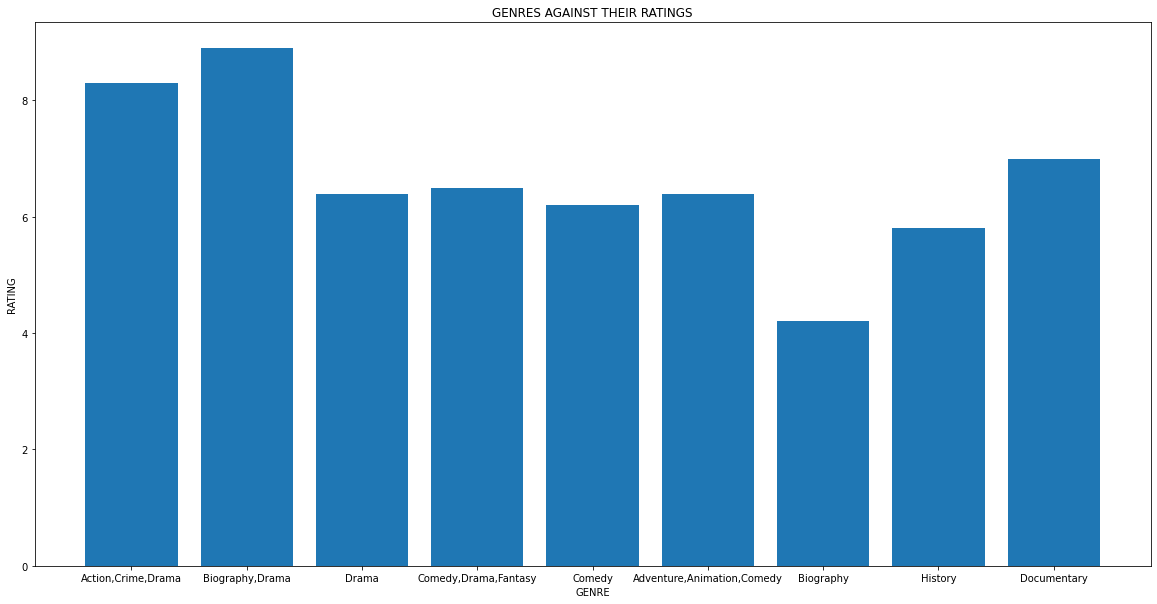

In [49]:
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(part['genres'],part['ratings'])
ax.set_xlabel('GENRE')
ax.set_ylabel('RATING')
ax.set_title('GENRES AGAINST THEIR RATINGS')

KeyError: 'popularity'

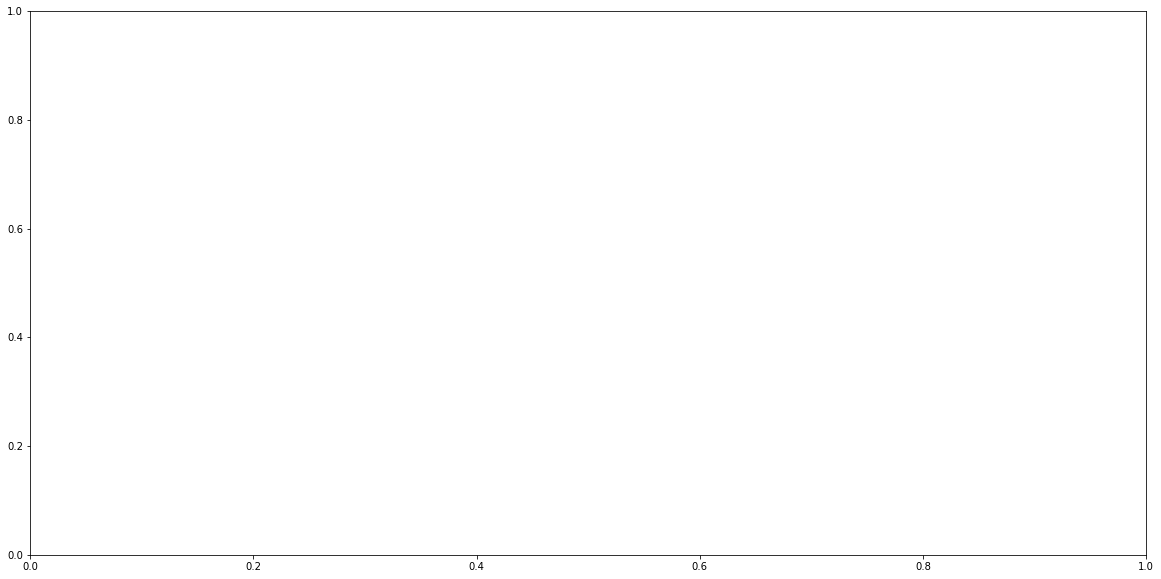

In [51]:
#Lets check which genres are most popular
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(part['genres'],part['popularity'])
ax.set_xlabel('GENRE')
ax.set_ylabel('POPULARITY')
ax.set_title('GENRES AGAINST THEIR POPULARITY')